# Tangelo hands-on: simulating quantum circuits

## Before you jump in

This hands-on notebook complements existing tutorials, documentation and the developer notes available in the Tangelo GitHub repositories, which present content in much more depth.

You will come across code cells that require you to change code or fill in the blanks in order to achieve a desired outcome. There may be many ways to solve these simple exercises, and you are encouraged to explore.

----

**Getting started**

Please have a look at the landing page of this repository for guidance about how to deploy these notebooks and get started easily.

In order to complete this hands-on tutorial, we recommend you use the latest version of Tangelo.
If you encounter errors related to missing Python packages (classical chemistry backend, quantum circuit simulator...), you can install them on-the-fly by typing `!pip install <package-name>` in a new code cell, and then restart the Jupyter notebook kernel.

In [ ]:
# If Tangelo is not found in your current environment, this cell installs all dependencies required for this hands-on
try:
    import tangelo
except ModuleNotFoundError:
    !pip install git+https://github.com/goodchemistryco/Tangelo.git@develop  --quiet
    !pip install qulacs qiskit qiskit-aer --quiet

----

For this hands-on, we recommend you consider the following resources:
- the latter half of this [tutorial notebook](https://github.com/goodchemistryco/Tangelo-Examples/blob/main/examples/workflow_basics/1.the_basics.ipynb) on `linq`, on conversion functions as well as built-in simulators
- Optional: our [blog post](https://goodchemistry.com/blog/) about harnessing the diversity of compute backends
- Optional: If you're familiar with quantum simulators (Qiskit, Qulacs, Cirq, etc), you can also check out the [source code](https://github.com/goodchemistryco/Tangelo/tree/main/tangelo/linq/target) for the `Backend` class and the different targets supported to see how we leverage them to perform calculations in various scenarios.

----

## Hands-on

### 1. Noiseless simulation

There are a number of quantum circuit simulators available in popular projects such as Cirq, Qiskit, Qulacs, etc. Let's see how we can leverage them in Tangelo using the simple circuit below.

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


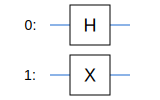

In [1]:
from tangelo.linq import Gate, Circuit

c = Circuit([Gate('H', 0), Gate('X', 1)])
c.draw()

Assuming the qubits are initialized in the $|00\rangle$ state, the outcome is the quantum state $\frac{1}{\sqrt 2}(|01\rangle + |11\rangle)$, where the leftmost bit describe the state of qubit 0 and the rightmost one qubit 1. Upon measurement, both states $|01\rangle$ and $|11\rangle$ should therefore have a probability of being observed of 0.5, while the probability of observing states $|00\rangle$ and $|10\rangle$ should be 0.

> **Q:** Can you use the function `get_backend` to simulate the previously defined quantum circuit c, and print the resulting probability histogram as well as the underlying statevector ? Try a few backends such as `"cirq"`, `"qulacs"` and `"qiskit"`. What do you observe ?

In [1]:
from tangelo.linq import get_backend

# Insert code here

These simulators may have different features, accuracy and speed. Not all of them are able to return a state vector. They have their own interface and learning curve, but the interface above enables you to switch between different "built-in backends" easily, rather than explicitly learning how to use them on your own and adapting your code.

Actual quantum computers are not able to give us access to the quantum state. Instead, we rely on repeatedly preparing and sampling the quantum state in order to approximate its underlying probability distribution. Each repetition is called a "shot".

> **Q:** Can you simulate the previous circuit and print the histogram of frequencies obtained for 100, 10000 and 1000000 shots ? What do you observe ?

In [3]:
for ns in [100, 10000, 1000000]:
    # Insert code here

The objects returned by `get_backend` are children classes of the `Backend` class. It is easy for Tangelo developers to define new backends or modify the behaviour of existing ones using object-oriented programming concepts such as inheritance.

### 2. Expectation values

Quantum algorithms often call for the computation of the expectation of a qubit operator $H$ (usually as a linear combination of Pauli words) with regard to a given state preparation $|\psi\rangle$ represented as a quantum circuit. This expectation value, often noted as $\langle H \rangle_{\psi}$ or $\langle\psi | H | \psi\rangle$, is a complex number conputed using the coefficients and terms present in the operator `H` itself, as well as $|\psi\rangle$. It is therefore influenced by things such as the accuracy of your backend and the number of shots chosen.

Very often, this operator encodes the use case a given algorithm attempts to solve. Mapping a problem into qubit operators is a topic of research, and several mappings are offered in Tangelo for the purpose of encoding molecular systems: we will touch that in another hands-on.

In Tangelo, qubit operators are currently following the OpenFermion format. The `QubitOperator` class implements a number of mathematical operations on this data-structure, such as multiplication, addition, division, etc.

Below we define the operator `qb_op` = $0.3 X_0 + 0.5 Z_0Z_1 + 2$, which consists of a linear combination of 3 Pauli words. The coefficient in front of each word is sometimes called a prefactor.

In [22]:
from tangelo.toolboxes.operators import QubitOperator

qb_op = 0.3 * QubitOperator('X0') + 0.5 * QubitOperator('Z0 Z1') + 2
print(qb_op)

2.0 [] +
0.3 [X0] +
0.5 [Z0 Z1]


> **Q:** Pick a simulator backend of your choice. Can you compute the expectation of `qb_op` with regards to the state preparation defined by circuit `c` ?

In [4]:
sim = get_backend("cirq")

# Insert code here

It may be that you have obtained frequencies from execuitng a quantum circuit on a real quantum device, or a previous simulation. That step may have been time-consuming or expensive: in that case, it makes sense to compute the expectation value of a Pauli word by providing those frequencies as input.

> **Q:** What method of the backend class can be used to compute the expectation value of a single Pauli word, by providing a histogram of frequency as input ? (you can refer to the resources described at the beginning of this hands-on or explore the Backend class)

We will show in a later hands-on how this method can be used in practice to help us post-process experimental results.

### 3. Conversion functions

The Tangelo format used to represent gates and circuits is rather abstract, since it never describes the actual mathematical operations associated to the gates defined by the user: it merely stores data. However, backends such as Qiskit, Qulacs, Cirq, etc, have their own representations for these objects. Under the hood, Tangelo must convert between its own format and the "target" format.

> **Q:** Can you use the translate functions to produce a Qiskit equivalent of our quantum circuit `c` and our operator `qu_op` ? And then convert those objects from the Qiskit format into the Cirq format ?

In [ ]:
from tangelo.linq import translate_circuit, translate_operator

# Insert code here
c_qiskit = 
op_qiskit = 

print(c_qiskit)
print(op_qiskit)

In [ ]:
# Insert code here
c_cirq = 
op_cirq = 

print(c_cirq)
print(op_cirq)

Although Tangelo does not require you to perform format conversion to leverage its built-in simulators, you are free to use them in order to leverage various frameworks simultaneously in your projects, or exports your circuits and operators in the preferred format for yourself or your collaborators.

# Final words

You have reached the end of this hands-on. By now you should have an understanding of how to use built-in backends in tangelo to simulate a quantum circuit and compute expectation values. These two operations are pretty much the essential buildings blocks of quantum algorithms !

Do not hesitate to explore the resources mentioned at the beginning of this notebook at your own pace to learn more about the topics discussed here. There is so much more we can do, including noisy simulation, or desired measurement values for circuits containing mid-circuit measurements.